<img src="https://github.com/y-sm-s/Analyse-Statistique-des-Buts-dans-le-Football-International/blob/main/soccer-pitch.jpg" />

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [ ]:
# Importation des bibliothèques  
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt  
from datetime import date  
from scipy.stats import shapiro  
import pingouin

# Étape 1 : Chargement des données  
women_res = pd.read_csv('women_results.csv')
men_res = pd.read_csv('men_results.csv')

# Fonction pour explorer le dataset  
def exploring_dataset(dataframe):
    print('_HEAD_'.center(50, '*'))
    display(dataframe.head())
    print('_TAIL_'.center(50, '*'))
    display(dataframe.tail())
    print('_INFO_'.center(50, '*'))
    print(dataframe.info())
    print('_DESCRIBE_'.center(50, '*'))
    print(dataframe.describe())
    print(dataframe.isnull().sum().sort_values(ascending=False))

exploring_dataset(women_res)
exploring_dataset(men_res)
    
    
# Conversion de la colonne date en datetime dans chaque DataFrame  
women_res['date'] = pd.to_datetime(women_res['date'])
men_res['date'] = pd.to_datetime(men_res['date'])

# Filtrage des données : FIFA World Cup depuis 01-01-2002  
w_res = women_res[(women_res['date'] >= "2002-01-01") & (women_res['tournament'] == 'FIFA World Cup')]
m_res = men_res[(men_res['date'] >= "2002-01-01") & (men_res['tournament'] == 'FIFA World Cup')]

**********************_HEAD_**********************


,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1969-11-01,Italy,France,1,0,Euro
1,1,1969-11-01,Denmark,England,4,3,Euro
2,2,1969-11-02,England,France,2,0,Euro
3,3,1969-11-02,Italy,Denmark,3,1,Euro
4,4,1975-08-25,Thailand,Australia,3,2,AFC Championship


**********************_TAIL_**********************


,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
4879,4879,2022-07-22,Sweden,Belgium,1,0,UEFA Euro
4880,4880,2022-07-23,France,Netherlands,1,0,UEFA Euro
4881,4881,2022-07-26,England,Sweden,4,0,UEFA Euro
4882,4882,2022-07-27,Germany,France,2,1,UEFA Euro
4883,4883,2022-07-31,England,Germany,2,1,UEFA Euro


**********************_INFO_**********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4884 non-null   int64 
 1   date        4884 non-null   object
 2   home_team   4884 non-null   object
 3   away_team   4884 non-null   object
 4   home_score  4884 non-null   int64 
 5   away_score  4884 non-null   int64 
 6   tournament  4884 non-null   object
dtypes: int64(3), object(4)
memory usage: 267.2+ KB
None
********************_DESCRIBE_********************
        Unnamed: 0   home_score   away_score
count  4884.000000  4884.000000  4884.000000
mean   2441.500000     2.272727     1.431409
std    1410.033688     2.736377     1.974651
min       0.000000     0.000000     0.000000
25%    1220.750000     0.000000     0.000000
50%    2441.500000     1.000000     1.000000
75%    3662.250000     3.000000     2.000000
max    4883.000

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1872-11-30,Scotland,England,0,0,Friendly
1,1,1873-03-08,England,Scotland,4,2,Friendly
2,2,1874-03-07,Scotland,England,2,1,Friendly
3,3,1875-03-06,England,Scotland,2,2,Friendly
4,4,1876-03-04,Scotland,England,3,0,Friendly


**********************_TAIL_**********************


,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
44348,44348,2022-12-14,Thailand,Taiwan,0,1,Friendly
44349,44349,2022-12-14,Vietnam,Philippines,1,0,Friendly
44350,44350,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup
44351,44351,2022-12-17,Singapore,Maldives,3,1,Friendly
44352,44352,2022-12-18,Argentina,France,3,3,FIFA World Cup


**********************_INFO_**********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44353 non-null  int64 
 1   date        44353 non-null  object
 2   home_team   44353 non-null  object
 3   away_team   44353 non-null  object
 4   home_score  44353 non-null  int64 
 5   away_score  44353 non-null  int64 
 6   tournament  44353 non-null  object
dtypes: int64(3), object(4)
memory usage: 2.4+ MB
None
********************_DESCRIBE_********************
         Unnamed: 0    home_score    away_score
count  44353.000000  44353.000000  44353.000000
mean   22176.000000      1.740559      1.178793
std    12803.752581      1.748722      1.394580
min        0.000000      0.000000      0.000000
25%    11088.000000      1.000000      0.000000
50%    22176.000000      1.000000      1.000000
75%    33264.000000      2.000000      

In [16]:
# Étape 2 : Calcul du score total  
w_res['total_score'] = w_res['home_score'] + w_res['away_score']
m_res['total_score'] = m_res['home_score'] + m_res['away_score']

# Statistiques descriptives  
print("Statistiques descriptives pour les matchs féminins :")
print(w_res['total_score'].describe())
print("\nStatistiques descriptives pour les matchs masculins :")
print(m_res['total_score'].describe())

Statistiques descriptives pour les matchs féminins :
count    200.000000
mean       2.980000
std        2.022387
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       13.000000
Name: total_score, dtype: float64

Statistiques descriptives pour les matchs masculins :
count    384.000000
mean       2.513021
std        1.652544
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        8.000000
Name: total_score, dtype: float64


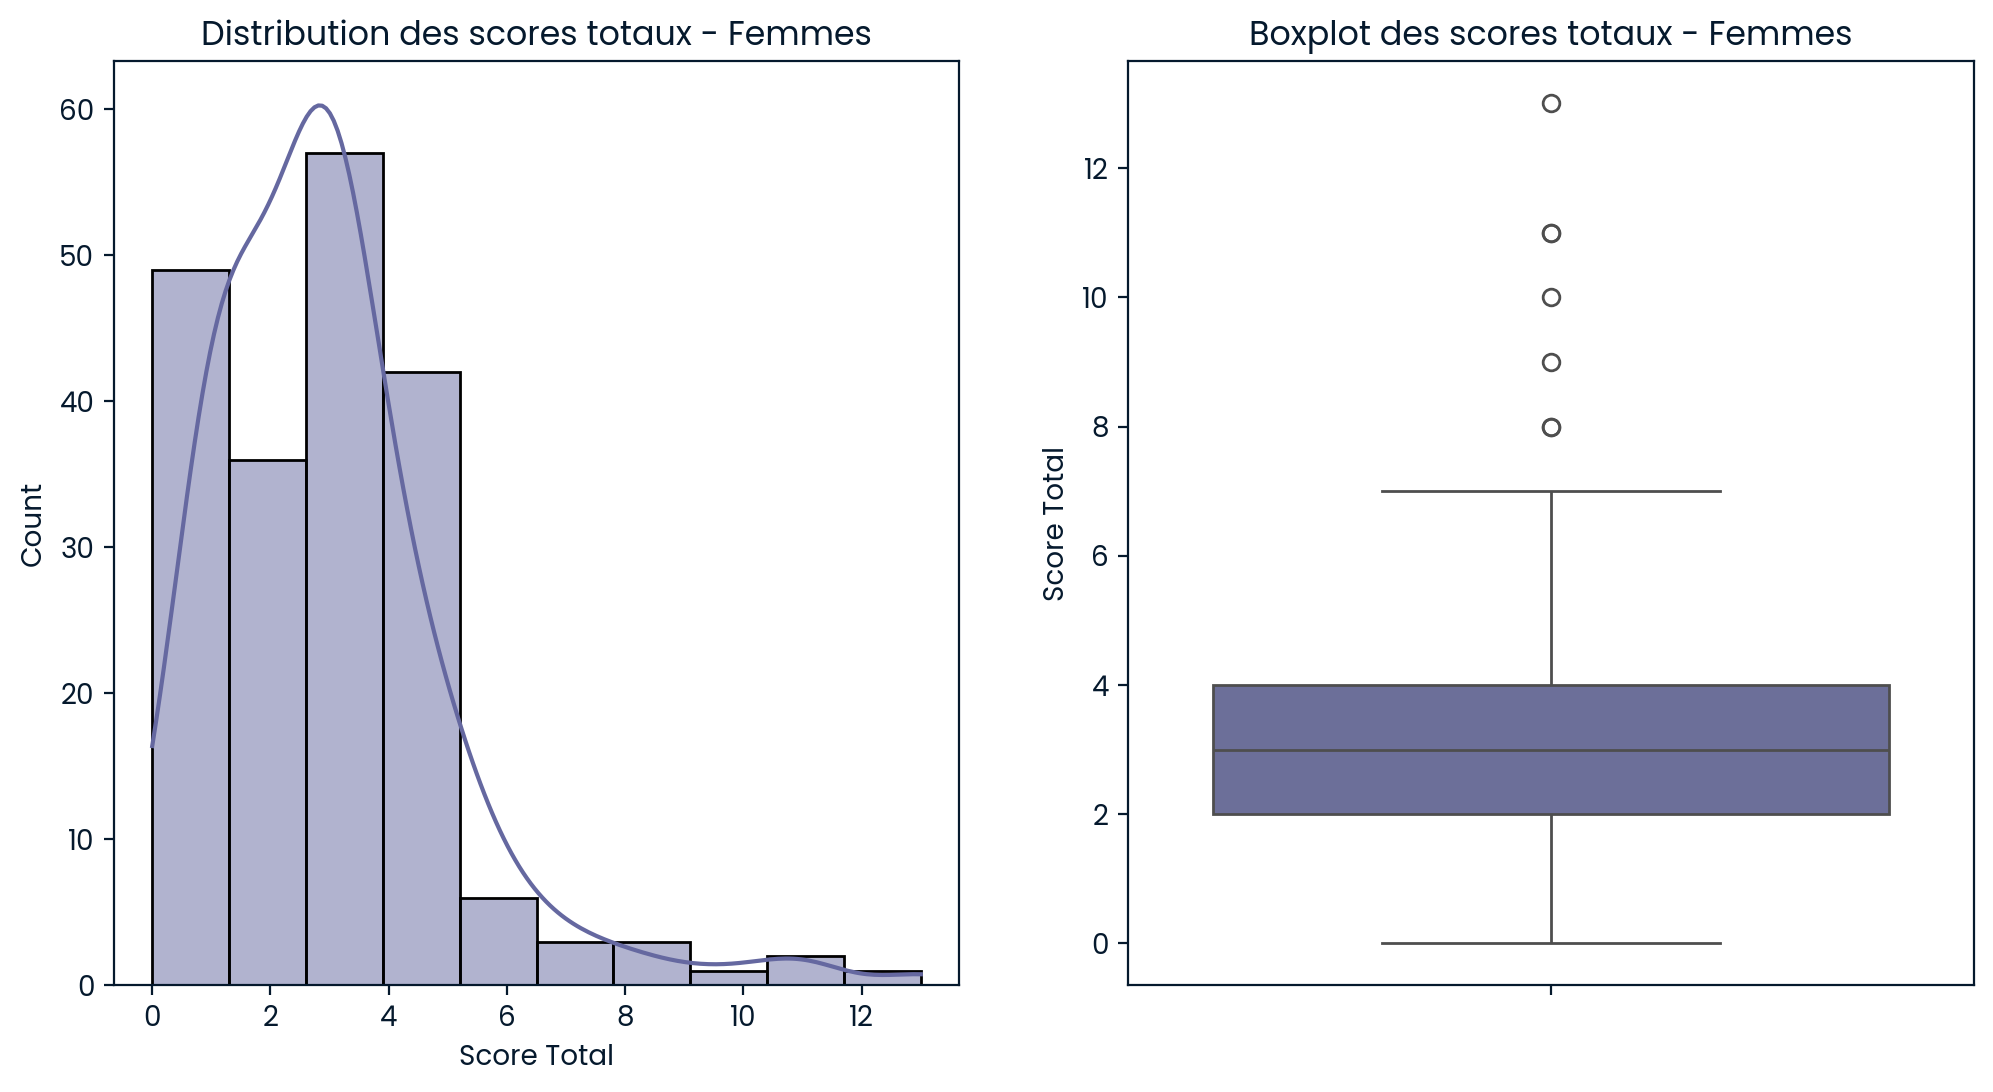

In [9]:
# Visualisation des scores totaux  
plt.figure(figsize=(12, 6))

# Histogramme et boxplot pour les matchs de football féminin  
plt.subplot(1, 2, 1)
sns.histplot(x='total_score', data=w_res, bins=10, kde=True)
plt.title('Distribution des scores totaux - Femmes')
plt.xlabel('Score Total')

plt.subplot(1, 2, 2)
sns.boxplot(y='total_score', data=w_res)
plt.title('Boxplot des scores totaux - Femmes')
plt.ylabel('Score Total')

plt.show()


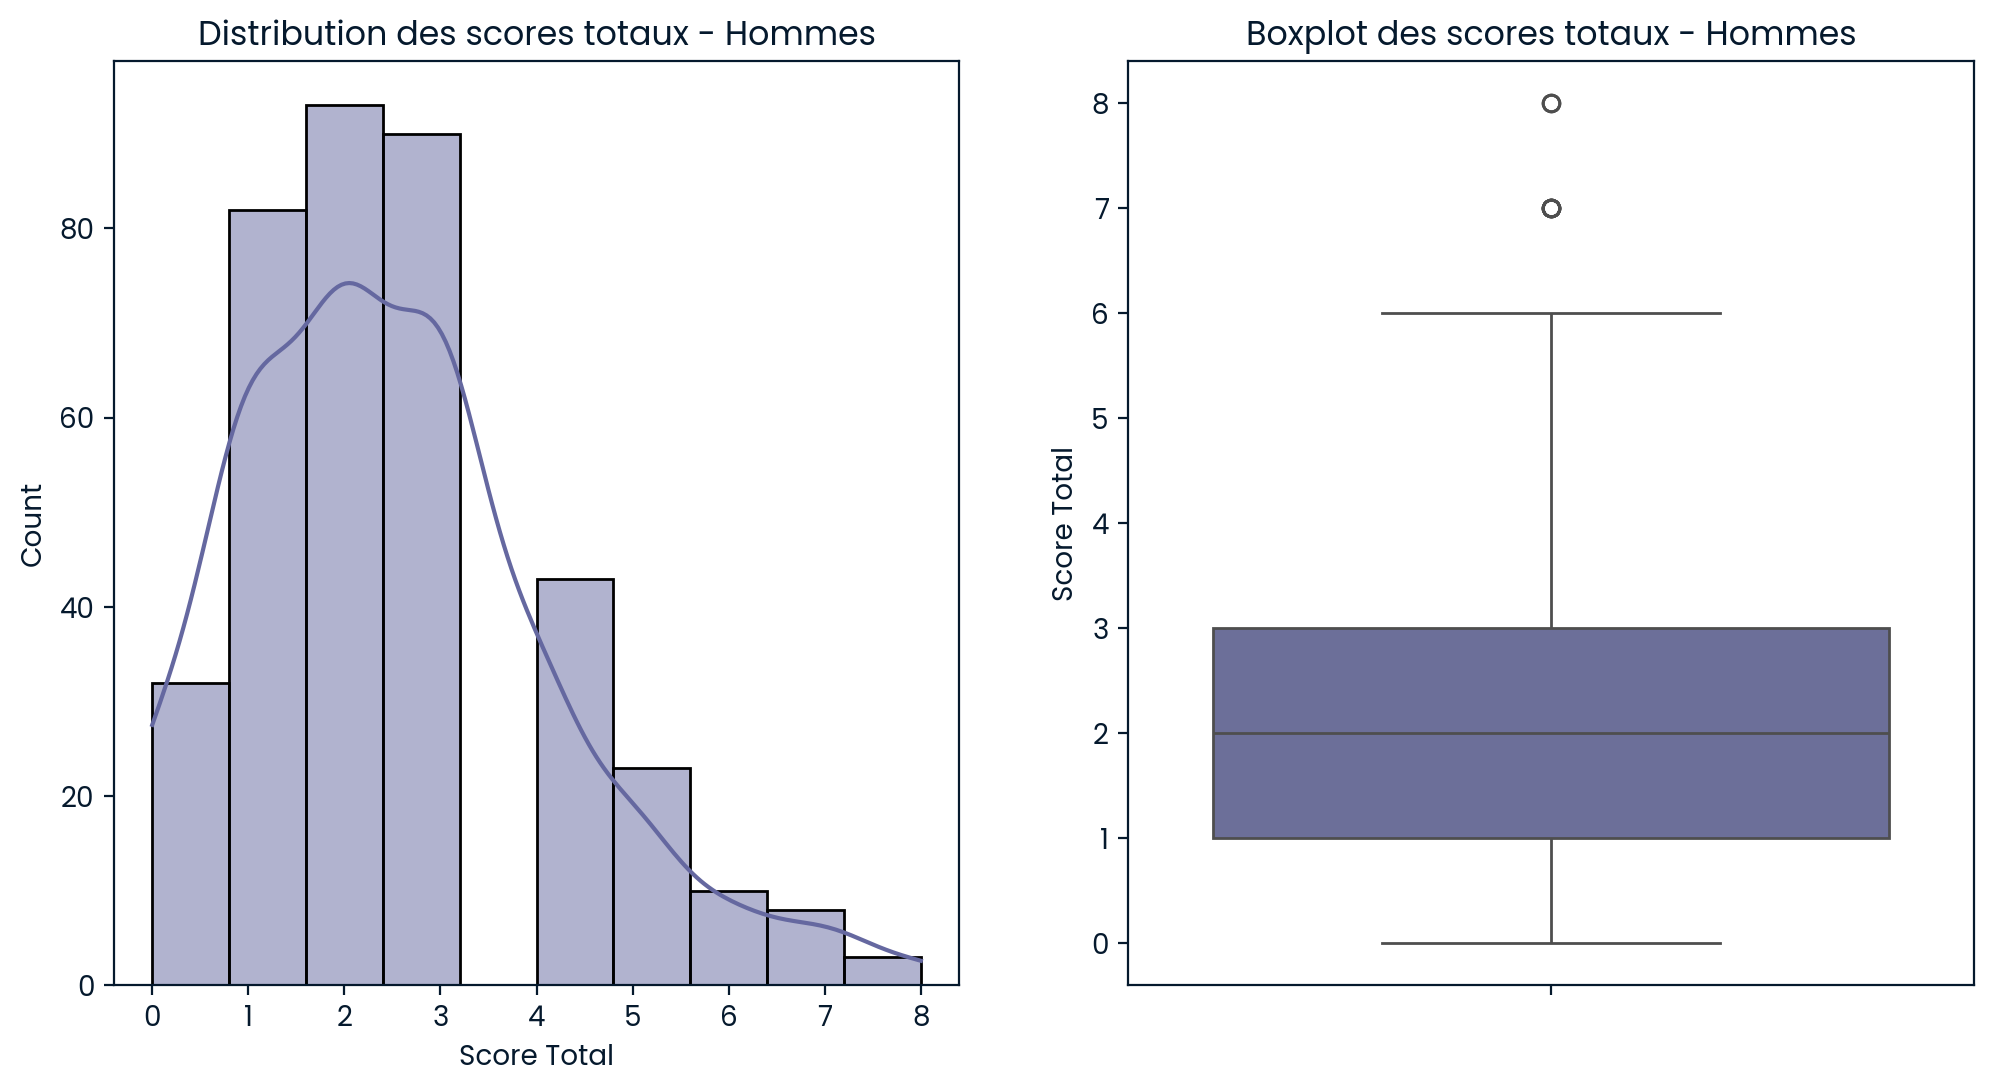

In [10]:
# Histogramme et boxplot pour les matchs de football masculin  
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(x='total_score', data=m_res, bins=10, kde=True)
plt.title('Distribution des scores totaux - Hommes')
plt.xlabel('Score Total')

plt.subplot(1, 2, 2)
sns.boxplot(y='total_score', data=m_res)
plt.title('Boxplot des scores totaux - Hommes')
plt.ylabel('Score Total')

plt.show()

In [18]:
# Étape 3 : Test de normalité avec Shapiro-Wilk  
alpha = 0.01

stat_w, p_w = shapiro(w_res['total_score'])
print(f'Test Shapiro-Wilk pour les femmes: p_value: {p_w}, statistic: {round(stat_w, 4)}\n')
print(f'La p-value est-elle inférieure à alpha ({alpha}) ? : {p_w < alpha}\n')

stat_m, p_m = shapiro(m_res['total_score'])
print(f'Test Shapiro-Wilk pour les hommes: p_value: {p_m}, statistic: {round(stat_m, 4)}')
print(f'La p-value est-elle inférieure à alpha ({alpha}) ? : {p_m < alpha}\n')

Test Shapiro-Wilk pour les femmes: p_value: 3.8905201759850683e-13, statistic: 0.8491

La p-value est-elle inférieure à alpha (0.1) ? : True

Test Shapiro-Wilk pour les hommes: p_value: 8.894154401688226e-13, statistic: 0.9266
La p-value est-elle inférieure à alpha (0.1) ? : True



In [12]:
# Fonction pour exclure les valeurs aberrantes via l'IQR  
def iqr(colonne):
    return colonne.quantile(0.75) - colonne.quantile(0.25)

def trans_out(df, col):
    iqr_df = df[col].agg(iqr)
    q3 = df[col].quantile(0.75)
    q1 = df[col].quantile(0.25)
    upper = q3 + (1.5 * iqr_df)
    lower = q1 - (1.5 * iqr_df)
    no_out = df[(df[col] > lower) & (df[col] < upper)]
    return no_out

# Exclusion des outliers  
no_outlier_w = trans_out(w_res, 'total_score')
no_outlier_m = trans_out(m_res, 'total_score')

# Réalisation du test de normalité sans outliers  
def shapiro_t(df, col):
    for column in col:
        stat, p = shapiro(df[column])
        print(f'Test Shapiro-Wilk pour {column}: p_value: {p}, statistic: {round(stat, 4)}')
        print(f'La p-value est-elle inférieure à alpha ({alpha}) ? : {p < alpha}\n')

shapiro_t(no_outlier_w, ['total_score'])
shapiro_t(no_outlier_m, ['total_score'])

Test Shapiro-Wilk pour total_score: p_value: 1.5339841752393113e-07, statistic: 0.9348
La p-value est-elle inférieure à alpha (0.1) ? : True

Test Shapiro-Wilk pour total_score: p_value: 1.5176323739374276e-11, statistic: 0.9345
La p-value est-elle inférieure à alpha (0.1) ? : True



In [19]:
# Étape 4 : Test de Mann-Whitney  
score_women_vs_men = pingouin.mwu(x=no_outlier_w['total_score'],
                                   y=no_outlier_m['total_score'],
                                   alternative='greater')
# Extraction de la p-value  
p_val = score_women_vs_men['p-val'].values[0]
print(f'Nom du test : Mann-Whitney, P-value : {round(p_val, 4)}\n')
print(f'La p-value est-elle inférieure à alpha ({alpha}) ? : {p_val < alpha}\n')

# Conclusion : Rejet de H0 si p-valeur < alpha  
result = "reject" if p_val < alpha else "fail to reject"
result_dict = {"p_val": p_val, "result": result}
print(result_dict)

Nom du test : Mann-Whitney, P-value : 0.0023

La p-value est-elle inférieure à alpha (0.1) ? : True

{'p_val': 0.002292719573400016, 'result': 'reject'}
